In [8]:
# importer les librairies nécessaires
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
#importer les données
train_data = pd.read_csv(r"datasets/income/train-data.csv")
test_data = pd.read_csv(r"datasets/income/test-data.csv")

In [10]:
# format des données
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (100, 5)
Shape of testing data : (100, 5)


In [11]:
train_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,30,34,73,1,0
1,36,103,85,1,0
2,54,101,24,1,0
3,28,101,68,0,1
4,24,39,65,1,0


# Maintenant on a besoin de diviser les données de training en clusters puis prédire en quel cluster appartient une nouvelle entrée de données

In [12]:
#Création du modèle K-means
model = KMeans()

In [13]:
# Ajuster le modèle aux training data
model.fit(train_data)

KMeans()

In [14]:
# Nombre de Clusters
print('\nDefault number of Clusters : ',model.n_clusters)


Default number of Clusters :  8


In [15]:
#prédire sur les données d'entrainement
predict_train = model.predict(train_data)
print('\nCLusters on train data',predict_train) 


CLusters on train data [3 7 0 7 3 5 5 1 7 2 1 1 4 0 1 1 0 6 5 3 6 4 4 0 6 0 1 1 0 4 6 4 4 0 0 1 2
 1 2 4 0 2 1 1 0 4 4 0 7 1 4 0 5 1 0 1 5 2 3 6 4 3 5 0 4 0 6 4 4 1 5 1 3 5
 7 7 3 4 5 4 5 4 1 5 2 5 0 4 2 4 6 7 1 0 1 5 4 3 1 3]


In [16]:
# prédire sur les données de test
predict_test = model.predict(test_data)
print('Clusters on test data',predict_test)

Clusters on test data [4 3 2 0 5 3 0 4 5 6 4 6 5 5 5 4 4 5 5 7 0 0 5 5 4 5 0 3 5 0 1 3 4 5 3 0 1
 1 4 0 0 3 2 0 5 4 5 7 4 4 6 3 4 1 3 4 1 4 4 2 4 4 5 1 7 5 1 5 4 4 5 2 0 1
 5 0 4 0 4 3 4 5 6 0 2 3 4 5 3 0 3 6 4 5 0 3 3 3 1 0]


In [17]:
# On va entrainer le modèle avec un nombre de clusters défini n_cluster = 3
model_n3 = KMeans(n_clusters=3)

In [18]:
# Ajuster le modèle aux training data
model_n3.fit(train_data)

KMeans(n_clusters=3)

In [19]:
#nombre des clusters
print('\nNumber of Clusters : ',model_n3.n_clusters)


Number of Clusters :  3


In [20]:
# prédire sur les données d'entrainement
predict_train_3 = model_n3.predict(train_data)
print('\nCLusters on train data',predict_train_3) 


CLusters on train data [2 0 1 0 2 1 2 0 0 2 0 0 2 1 0 0 1 2 2 2 2 2 2 1 2 1 0 0 1 2 2 2 2 1 1 0 2
 0 2 2 1 2 0 0 1 2 2 1 0 0 2 1 2 0 1 0 2 2 2 2 2 2 2 1 2 1 2 2 2 0 1 0 2 2
 0 0 0 2 0 2 2 2 0 2 2 2 1 2 2 2 2 0 0 1 0 2 2 2 0 2]


In [21]:
# prédire sur les données de test
predict_test_3 = model_n3.predict(test_data)
print('Clusters on test data',predict_test_3) 

Clusters on test data [2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 0 1 1 2 2 2 2 1 2 2 1 0 2 2 2 2 1 0
 0 2 1 1 2 2 1 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 0 2 2 2 0 2 1 0
 2 1 2 1 2 0 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 0 1]


In [22]:
# VISUALISATION

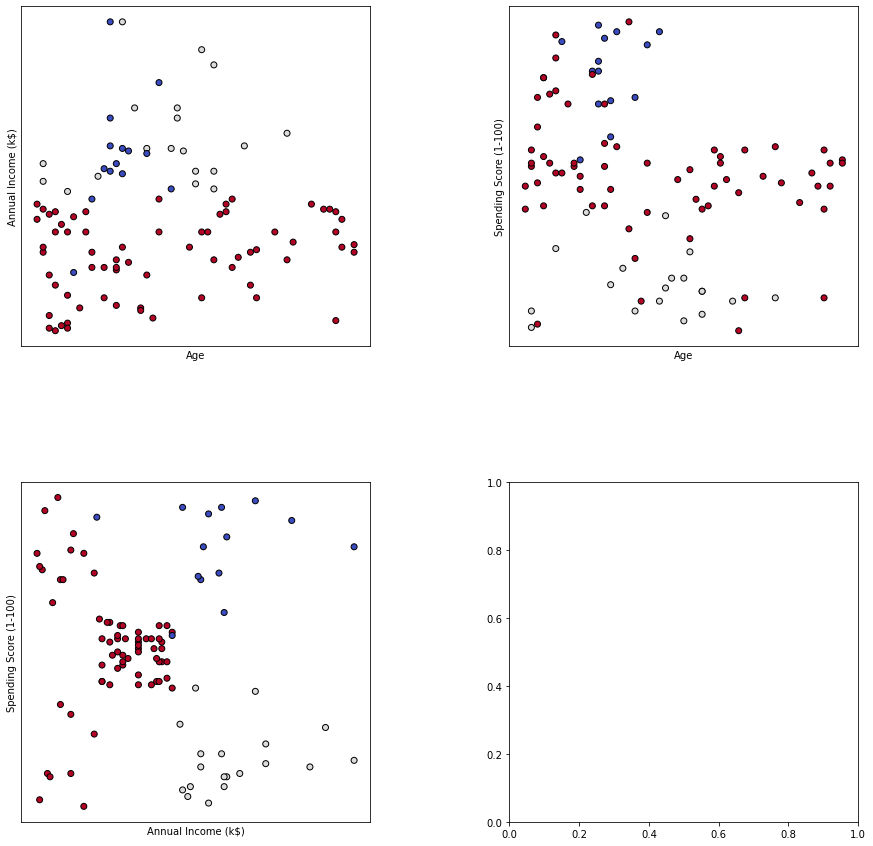

In [35]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

couple = [["Age","Annual Income (k$)"],
           ["Age","Spending Score (1-100)"],
           ["Annual Income (k$)","Spending Score (1-100)"]]

for i,ax in zip(range(0,len(couple)), sub.flatten()):
    col1 = couple[i][0]
    col2 = couple[i][1]
    
    ax.scatter(test_data[col1],test_data[col2],c=predict_test_3, cmap=plt.cm.coolwarm,edgecolors='k')

    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()